# Interventional Causal Representation Learning

This is a demo Jupyter notebook for the paper Interventional Causal Rrepresentation Learning.

First, generate PyGame dataset. We will use 20000 train size and 1000 test size. The latent variables constructs a non-linear SCM, and we assume that the data contains data from interventions_per_latent(3) * latent_dim(4) = 12 interventional distributions.

In [1]:
# import os
# command = "python data/balls_dataset.py  --train_size 20000 --test_size 1000 --distribution_case 'intervention' --latent_case 'scm' --scm_mechanism 'non_linear' --interventions_per_latent 1"
# os.system(command)

In [2]:
import numpy as np

train_x_path    = 'data/datasets/balls_scm_non_linear/intervention/train_x.npy'
train_y_path    = 'data/datasets/balls_scm_non_linear/intervention/train_y.npy'
train_z_path    = 'data/datasets/balls_scm_non_linear/intervention/train_z.npy'
# val_x_path      = 'data/datasets/balls_scm_non_linear/intervention/val_x.npy'
# val_y_path      = 'data/datasets/balls_scm_non_linear/intervention/val_y.npy'
# val_z_path      = 'data/datasets/balls_scm_non_linear/intervention/val_z.npy'
test_x_path     = 'data/datasets/balls_scm_non_linear/intervention/test_x.npy'
test_y_path     = 'data/datasets/balls_scm_non_linear/intervention/test_y.npy'
test_z_path     = 'data/datasets/balls_scm_non_linear/intervention/test_z.npy'

Here are the descriptions of the variables:
- X contains the image
- Z contains the latent variable (spatial coordinates of the balls)
- Y contains the label of the interventional status of the balls. -1 is the default value.
    - First axis    : index of ball (ranging from 0 - 3)
    - Second axis   : intervention value (ranging from 0 - 1)

In [3]:
train_x = np.load(train_x_path) # [ train_size, 64, 64, 3 ]
train_y = np.load(train_y_path) # [ train_size, 2 ]
train_z = np.load(train_z_path) # [ train_size, 4 ]

test_x = np.load(test_x_path) # [ test_size, 64, 64, 3 ]
test_y = np.load(test_y_path) # [ test_size, 2 ]
test_z = np.load(test_z_path) # [ test_size, 4 ]

In [4]:
from model.encoder import ImageEncoder
from model.decoder import ImageDecoder

latent_dim = 4

# ignore the warnings
encoder = ImageEncoder(latent_dim=latent_dim)
decoder = ImageDecoder(latent_dim=latent_dim)

C:\Users\wenbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\wenbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
from model.train import train, reconstruct
import matplotlib.pyplot as plt
import torch

# set to True then will skip training
warm_start = True

train_config = {
    'lr'            : 5e-4,
    'batch_size'    : 64,
    'num_epoch'     : 200,        
    'weight_decay'  : 5e-4,
    'device'        : 'cuda:0',
    'log_int'       : 10
}

if warm_start:

    encoder.load_state_dict(torch.load('encoder_epochs100.pth'))
    decoder.load_state_dict(torch.load('decoder_epochs100.pth'))

    # train_config['num_epoch'] = 1
    train_losses = train(train_x, encoder, decoder, train_config)

    # torch.save(encoder.state_dict(), 'encoder_20000.pth')
    # torch.save(decoder.state_dict(), 'decoder_20000.pth')

    # encoder.load_state_dict(torch.load('encoder_epochs100.pth'))
    # decoder.load_state_dict(torch.load('decoder_epochs100.pth'))

    # encoder.load_state_dict(torch.load('saved_model/encoder_20000.pth'))
    # decoder.load_state_dict(torch.load('saved_model/decoder_20000.pth'))

else:

    train_losses = train(train_x, encoder, decoder, train_config)

Epoch: 0	 Loss: 7156.4873046875
Epoch: 10	 Loss: 6939.3671875
Epoch: 20	 Loss: 7088.67333984375
Epoch: 30	 Loss: 6975.98193359375
Epoch: 40	 Loss: 6973.3701171875
Epoch: 50	 Loss: 6631.41552734375
Epoch: 60	 Loss: 6330.189453125
Epoch: 70	 Loss: 6635.47021484375
Epoch: 80	 Loss: 6575.0419921875
Epoch: 90	 Loss: 5422.75927734375
Epoch: 100	 Loss: 5702.39990234375
Epoch: 110	 Loss: 4717.6884765625
Epoch: 120	 Loss: 5914.40576171875
Epoch: 130	 Loss: 4765.595703125
Epoch: 140	 Loss: 4496.3505859375
Epoch: 150	 Loss: 4487.0009765625
Epoch: 160	 Loss: 5198.20849609375
Epoch: 170	 Loss: 4874.373046875
Epoch: 180	 Loss: 4165.72607421875
Epoch: 190	 Loss: 4034.46240234375


In [6]:
# torch.save(encoder.state_dict(), 'encoder_epochs100.pth')
# torch.save(decoder.state_dict(), 'decoder_epochs100.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


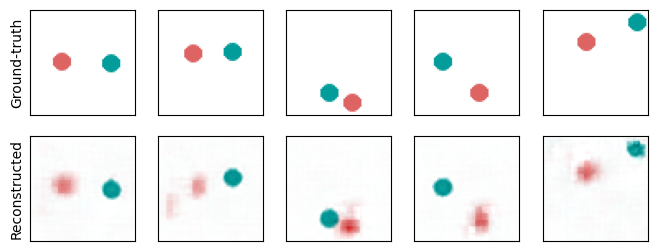

In [7]:
# # plot training loss curve
# plt.plot(train_losses, lw = 1)
# plt.ylabel('Train Loss')
# plt.xlabel('Epochs')
# plt.show()

# plot reconstruction, ignore warnings
x, x_pred, z_pred = reconstruct(test_x, encoder, decoder, train_config)
fig, ax = plt.subplots(2, 5, figsize = [8, 3])
for i in range(5):
    ax[0, i].imshow(x[i])
    ax[1, i].imshow(x_pred[i])
    if i==0:
        ax[0, i].set_ylabel('Ground-truth')
        ax[1, i].set_ylabel('Reconstructed')
    ax[0, i].set_yticks([])
    ax[1, i].set_yticks([])
    ax[0, i].set_xticks([])
    ax[1, i].set_xticks([])


In [8]:
# learn a linear mapping from do-interventions 
from model.gamma_map import GammaMap, train_gammamap

gm_train_config = {
    'lr'            : 1e-2,
    'batch_size'    : 64,
    'num_epoch'     : 300,            # 300
    'weight_decay'  : 5e-4,
    'device'        : 'cuda:0',
    'log_int'       : 100
}

tran_zs = []

for _ in range(5):
    gm = GammaMap(latent_dim, device = 'cuda:0')
    z_pred = z_pred.cpu().detach().to('cuda:0') # clean the gradients
    gm_losses = train_gammamap(z_pred, test_y, gm, gm_train_config)
    tran_z = gm.transform(z_pred).cpu().detach().numpy()    # [ B, latent_dim ] numpy.array
    tran_zs.append(tran_z)

Epoch: 0	 Loss: 30.8797824382782
Epoch: 100	 Loss: 19.123406284600495
Epoch: 200	 Loss: 18.982626945376396
Epoch: 0	 Loss: 30.908165834844112
Epoch: 100	 Loss: 18.054076375663282
Epoch: 200	 Loss: 19.0877955648303
Epoch: 0	 Loss: 30.0491561293602
Epoch: 100	 Loss: 18.324749736338855
Epoch: 200	 Loss: 19.528476316034794
Epoch: 0	 Loss: 33.85902500152588
Epoch: 100	 Loss: 18.771819670945405
Epoch: 200	 Loss: 18.91037976026535
Epoch: 0	 Loss: 46.83782160282135
Epoch: 100	 Loss: 18.37284495010972
Epoch: 200	 Loss: 18.778953234553338


In [9]:
from utils.MCC import MCC
# before
pred_z = z_pred.cpu().detach().numpy()
before_mcc = MCC(pred_z, test_z)

# after
mcc_list = []
for tran_z in tran_zs:
    mcc_list.append(MCC(tran_z, test_z))
after_mcc_mean  = np.mean(mcc_list)
after_mcc_std   = np.std(mcc_list)
print(f'[MCC]\t Before: {before_mcc : .2f}\t After: {after_mcc_mean :.2f} ({after_mcc_std : .2f})')

[MCC]	 Before:  61.65	 After: 50.17 ( 4.97)


In [10]:
pred_z.shape

(1000, 4)

In [11]:
test_y[:, 1]

array([0.5       , 0.58333333, 0.41666667, 0.5       , 0.41666667,
       0.54166667, 0.375     , 0.375     , 0.54166667, 0.29166667,
       0.45833333, 0.29166667, 0.54166667, 0.33333333, 0.29166667,
       0.5       , 0.54166667, 0.75      , 0.33333333, 0.66666667,
       0.375     , 0.375     , 0.45833333, 0.29166667, 0.70833333,
       0.66666667, 0.375     , 0.54166667, 0.625     , 0.5       ,
       0.5       , 0.75      , 0.625     , 0.41666667, 0.41666667,
       0.5       , 0.41666667, 0.75      , 0.25      , 0.29166667,
       0.25      , 0.625     , 0.75      , 0.70833333, 0.29166667,
       0.66666667, 0.54166667, 0.45833333, 0.54166667, 0.45833333,
       0.41666667, 0.58333333, 0.66666667, 0.375     , 0.58333333,
       0.5       , 0.375     , 0.33333333, 0.5       , 0.45833333,
       0.5       , 0.54166667, 0.58333333, 0.54166667, 0.54166667,
       0.75      , 0.5       , 0.5       , 0.625     , 0.29166667,
       0.75      , 0.25      , 0.41666667, 0.70833333, 0.375  

: 